In [1]:
from sympy import *
init_printing()

In [2]:
# state
x, y, z, vx, vy, vz, qr, qx, qy, qz, wx, wy, wz = symbols('x y z v_x v_y v_z q_r q_x q_y q_z \\omega_x \\omega_y \\omega_z')
p                      = Matrix([x, y, z])
v                      = Matrix([vx, vy, vz])
q                      = Matrix([qr, qx, qy, qz])
s                      = Matrix([p, v, q])
s.T

In [3]:
# translational costate
lx, ly, lz, lvx, lvy, lvz = symbols('\\lambda_x \\lambda_y \\lambda_z \\lambda_{v_x} \\lambda_{v_y} \\lambda_{v_z}', real=True)

# quaternion costate
lqr, lqx, lqy, lqz= symbols("\\lambda_{q_r} \\lambda_{q_x} \\lambda_{q_y} \\lambda_{q_z}")

# full costate
lp                            = Matrix([lx, ly, lz])
lv                            = Matrix([lvx, lvy, lvz])
lq                            = Matrix([lqr, lqx, lqy, lqz])
l                             = Matrix([lp, lv, lq])
l.T

In [4]:
# controls: throttle, reaction wheels, ballast
ut, ub, ux, uy, uz = symbols("u_t u_b u_x u_y u_z", real=True)
urot = Matrix([ux, uy, uz])
actions = Matrix([ut, ub, ux, uy])
actions.T

In [5]:
# physical parametres
mass, gravity, density, CD, planaform, volume, thrust, rotation = symbols("m g \\rho C_D A V T_{max} \\omega_{max}")

# current velocity
vfx, vfy, vfz = symbols("v_{x_f} v_{y_f} v_{z_f}")
vf = Matrix([vfx, vfy, vfz])

# optimisation parametres
alpha = symbols("\\alpha")

In [6]:
# gravity
g = Matrix([0, 0, -gravity])

# free stream velocity
vinf = v - vf

# velocity magnitude
vmag = sqrt(vinf[0]**2 + vinf[1]**2 + vinf[2]**2)

# velocity direction
vhat = vinf/vmag

# gravity
Fg = mass*g

# fluid drag
Fd = - Rational(1,2)*density*vmag*vhat*CD*planaform

# buoyancy
Fb = -density*volume*g*ub

# thrust direction
ix = 2*(qx*qz - qy*qr)
iy = 2*(qy*qz - qx*qr)
iz = 1 - 2*(qx**2 + qy**2)
i  = Matrix([ix, iy, iz])

# thrust
Ft = thrust*ut*i

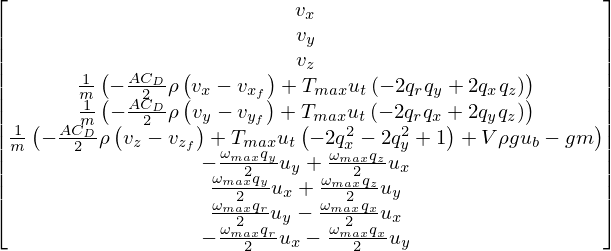

In [7]:
# translation
dp = v
dv = (Fg + Fd + Fb + Ft)/mass

# rotation
dq = rotation*Rational(1,2) * Matrix([
    [0, 0, -uy, ux],
    [0, 0, ux, uy],
    [uy, -ux, 0, 0],
    [-ux, -uy, 0, 0]
]) * q

# state transition
ds = Matrix([dp, dv, dq])
ds

In [8]:
# Lagrangian
L = (1-alpha)*(ut**2 + ub**2 + ux**2 + uy**2) + alpha*(ut + ub + ux + uy)
L

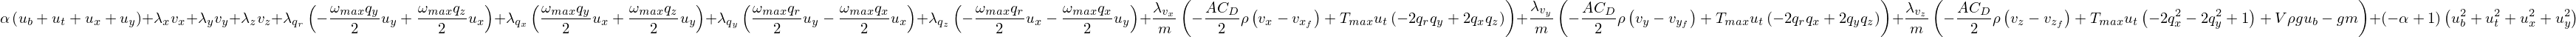

In [9]:
# Hamiltonian
H = l.dot(ds) + L
H

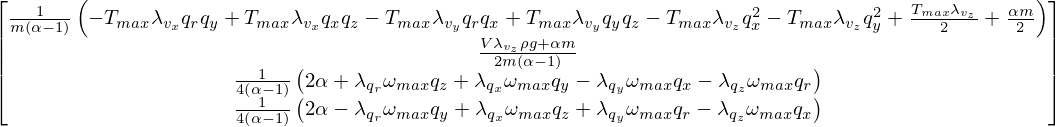

In [10]:
# Lagrangian gradient
dell = [H.diff(var) for var in [ut, ub, ux, uy]]
# solve for optimal actions
sol = solve(dell, [ut, ub, ux, uy])
actionsstar = actions.subs([(key, sol[key]) for key in sol.keys()])
simplify(actionsstar)

In [11]:
# fullstate equations of motion
dl = Matrix([-H.diff(var) for var in s])
dfs = Matrix([ds, dl])
print(cse(dfs))

([(x0, 1/m), (x1, A*C_D*\rho/2), (x2, T_{max}*u_t), (x3, 2*q_r), (x4, 2*q_z), (x5, \omega_{max}*q_y/2), (x6, \omega_{max}*q_z/2), (x7, \omega_{max}*q_r/2), (x8, \omega_{max}*q_x/2), (x9, A*C_D*\rho*x0/2), (x10, \lambda_{q_y}*\omega_{max}/2), (x11, \lambda_{q_z}*\omega_{max}/2), (x12, 2*T_{max}*\lambda_{v_x}*u_t*x0), (x13, 2*T_{max}*\lambda_{v_y}*u_t*x0), (x14, T_{max}*\lambda_{v_x}*u_t*x0), (x15, T_{max}*\lambda_{v_y}*u_t*x0), (x16, 4*T_{max}*\lambda_{v_z}*u_t*x0), (x17, \lambda_{q_r}*\omega_{max}/2), (x18, \lambda_{q_x}*\omega_{max}/2)], [Matrix([
[                                                                         v_x],
[                                                                         v_y],
[                                                                         v_z],
[                             x0*(-x1*(v_x - v_{x_f}) + x2*(q_x*x4 - q_y*x3))],
[                            x0*(-x1*(v_y - v_{y_f}) + x2*(-q_x*x3 + q_y*x4))],
[x0*(V*\rho*g*u_b - g*m - x1*(v_z - v_{z_f}) 

In [ ]:
print(cse(H))